# stackoverflow_survey_analysis

In this jupyter notebook the analysis of the Stack Overflow survey from 2020 to 2024 is presented.   
For the analysis, the [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process is used.

The [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process consists of the following steps:    
1. Business Understanding
2. Data Understandung
3. Data Preparation
4. Data Modeling
5. Result Evaluation
6. Deployment 

## 1. Business Understanding
The main objective of this analysis is to get used to the data science process according to [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) taught during the [Udacity - Data Scientist](https://www.udacity.com/course/data-scientist-nanodegree--nd025) Course and to apply the acquired knowledge to a real-world problem.

To achieve this, the analysis will use the [Stack Overflow surveys from 2020 to 2024](https://survey.stackoverflow.co/) to address the following three questions:

**When comparing the results from 2020 to 2024 ...**  

- **Question 1: ... did the difficulty of the survey increase over the past years?**
  - *Relevance*: Understanding changes in survey difficulty over time can help to ensure that any observed trends or patterns in the results are not due to changes in survey complexity.

- **Question 2: ... does the length of the survey have an effect on its experienced difficulty?**   
  - *Relevance*: Evaluating if the length of the survey influences the perceived difficulty helps to understand if the responses are affected by survey fatigue, which could impact the reliability of the results and the quality of the data collected.

- **Question 3: ... did the age of participants change over the past years?**   
  - *Relevance*: Analyzing changes in the age distribution of participants over time can reveal demographic shifts in the survey population.

## 2. Data understanding

This chapter describes the steps taken to understand the provided data by the Stack Overflow surveys from 2020 to 2024

### 2.1 Import packages and load dataframes

First, we import alle the relevant packages for the analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

Then we import the relevant surveys from 2020 to 2024 (incl. the corresponding schema) into our workspace

In [2]:
df_20 = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_public.csv')
df_20_schema = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_schema.csv')
df_21 = pd.read_csv('./data/stack-overflow-developer-survey-2021/survey_results_public.csv')
df_21_schema = pd.read_csv('./data/stack-overflow-developer-survey-2021/survey_results_schema.csv')
df_22 = pd.read_csv('./data/stack-overflow-developer-survey-2022/survey_results_public.csv')
df_22_schema = pd.read_csv('./data/stack-overflow-developer-survey-2022/survey_results_schema.csv')
df_23 = pd.read_csv('./data/stack-overflow-developer-survey-2023/survey_results_public.csv')
df_23_schema = pd.read_csv('./data/stack-overflow-developer-survey-2023/survey_results_schema.csv')
df_24 = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_public.csv')
df_24_schema = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_schema.csv')

Now, lets take a first look at the head of the 2020 to 2024 surveys

In [3]:
df_20.head(n=3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [4]:
df_21.head(n=3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


In [5]:
df_22.head(n=3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [6]:
df_23.head(n=3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


In [7]:
df_24.head(n=3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


### 2.2 Find common colums relevant for solving the questions

Lets find the coloums which are available in both datafields and which can be used to solve the three questions:    
**When comparing the results from 2020 to 2024 ...**  
- **Question 1: ... did the difficulty of the survey increase over the past years?**
- **Question 2: ... does the length of the survey have an effect on its experienced difficulty?**     
- **Question 3: ... did the age of participants change over the past years?**

In [8]:
# Find the common columns starting with the columns of the df_20 dataframe
common_columns = df_20.columns

# Intersect with the columns of the other dataframes from 2021 to 2024
for df in [df_21, df_22, df_23, df_24]:
    common_columns = common_columns.intersection(df.columns)

# Convert to a list and output result
common_columns_list = common_columns.tolist()

common_columns_list

['MainBranch',
 'Age',
 'CompTotal',
 'Country',
 'DevType',
 'EdLevel',
 'Employment',
 'NEWSOSites',
 'OrgSize',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'YearsCode',
 'YearsCodePro']

The description of each column can be found in the schema file:

In [9]:
pd.set_option('display.max_colwidth', None) # do not limit output
loc_column = common_columns_list
for loc_column in common_columns_list:
    # Print the question text from df_20_schema
    print(f"df_20_schema: Question text for '{loc_column}'")
    print(df_20_schema[df_20_schema['Column'] == loc_column]['QuestionText'].to_string(index=False))
    # Print the question text from df_21_schema
    print(f"df_21_schema: Question text for '{loc_column}'")
    print(df_21_schema[df_21_schema['qname'] == loc_column]['question'].to_string(index=False))
    # Print the question text from df_22_schema
    print(f"df_22_schema: Question text for '{loc_column}'")
    print(df_22_schema[df_22_schema['qname'] == loc_column]['question'].to_string(index=False))
    # Print the question text from df_23_schema
    print(f"df_23_schema: Question text for '{loc_column}'")
    print(df_23_schema[df_23_schema['qname'] == loc_column]['question'].to_string(index=False))
    # Print the question text from df_24_schema
    print(f"df_24_schema: Question text for '{loc_column}'")
    print(df_24_schema[df_24_schema['qname'] == loc_column]['question'].to_string(index=False))
    print("\n" + "-"*50 + "\n")  # Separator between different columns for better readability
pd.reset_option('display.max_colwidth')

df_20_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
df_21_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>
df_22_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>
df_23_schema: Question text for 'MainBranch'
Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code". *
df_24_schema: Question text for 'MainBranch'
Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".*

--------------------------------------------------

df_20_schema: Question text for 'Age'
What is your age (in years)? If you prefer not to answer, you 

Regarding the questions the following columns seem fitting to find answers during the analysis:
`['SurveyEase', 'SurveyLength', 'Age']`.


In [10]:
common_columns_to_answer = ['SurveyEase', 'SurveyLength', 'Age'] 

Lets have a short look at the content of alle the common columns for each year

In [11]:
df_20[common_columns_list].head(n=3) # survey from 2020

,MainBranch,Age,CompTotal,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro
0,I am a developer by profession,NaN,NaN,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Stack Overflow (public Q&A for anyone who codes),2 to 9 employees,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,36,27
1,I am a developer by profession,NaN,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,"1,000 to 4,999 employees",Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,7,4
2,I code primarily as a hobby,NaN,NaN,Russian Federation,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,4,NaN


In [12]:
df_21[common_columns_list].head(n=3) # survey from 2021

,MainBranch,Age,CompTotal,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro
0,I am a developer by profession,25-34 years old,4800.0,Slovakia,"Developer, mobile","Secondary school (e.g. American high school, G...","Independent contractor, freelancer, or self-em...",Stack Overflow,20 to 99 employees,Yes,"Yes, definitely",A few times per month or weekly,Multiple times per day,Easy,Appropriate in length,NaN,NaN
1,I am a student who is learning to code,18-24 years old,NaN,Netherlands,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time",Stack Overflow,NaN,Yes,"Yes, definitely",Daily or almost daily,Daily or almost daily,Easy,Appropriate in length,7,NaN
2,"I am not primarily a developer, but I write co...",18-24 years old,NaN,Russian Federation,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time",Stack Overflow;Stack Exchange,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,NaN,NaN


In [13]:
df_22[common_columns_list].head(n=3) # survey from 2022

,MainBranch,Age,CompTotal,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,NaN,NaN,Canada,NaN,NaN,"Employed, full-time",Collectives on Stack Overflow;Stack Overflow f...,NaN,Yes,Not sure,Daily or almost daily,Daily or almost daily,Difficult,Too long,NaN,NaN
2,"I am not primarily a developer, but I write co...",25-34 years old,32000.0,United Kingdom of Great Britain and Northern I...,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Collectives on Stack Overflow;Stack Overflow;S...,20 to 99 employees,Yes,Neutral,Multiple times per day,Multiple times per day,Neither easy nor difficult,Appropriate in length,14,5


In [14]:
df_23[common_columns_list].head(n=3) # survey from 2023

,MainBranch,Age,CompTotal,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,285000.0,United States of America,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Stack Overflow;Stack Exchange,2 to 9 employees,Yes,"Yes, definitely",A few times per month or weekly,Daily or almost daily,Easy,Appropriate in length,18,9
2,I am a developer by profession,45-54 years old,250000.0,United States of America,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Stack Overflow;Stack Exchange;Stack Overflow f...,"5,000 to 9,999 employees",Yes,Neutral,Less than once per month or monthly,A few times per month or weekly,Easy,Appropriate in length,27,23


In [15]:
df_24[common_columns_list].head(n=3)  # survey from 2024

,MainBranch,Age,CompTotal,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro
0,I am a developer by profession,Under 18 years old,NaN,United States of America,NaN,Primary/elementary school,"Employed, full-time",I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,NaN,United Kingdom of Great Britain and Northern I...,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Stack Overflow for Teams (private knowledge sh...,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,NaN,NaN,20,17
2,I am a developer by profession,45-54 years old,NaN,United Kingdom of Great Britain and Northern I...,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Stack Overflow;Stack Exchange;Stack Overflow B...,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,37,27


Since there seem to be a lot of NaN's, let's count them down for the common colums.

In [16]:
def calculate_nan_percentage(df, columns):
    '''
    Function to calculate NaN value's percentage
    from a datafield and a columns list
    
    Args:
        df: The dataframe which will be processed
        columns: columns list for which NaN's are calculated

    Returns:
        Series containing the percentage of NaN value
    '''
    return (df[columns].isna().sum() / df[columns].shape[0]) * 100

# List of dataframes for each year
dfs = {
    "2020": df_20,
    "2021": df_21,
    "2022": df_22,
    "2023": df_23,
    "2024": df_24
}

# Calculate NaN percentages and print results
for year, df in dfs.items():
    nan_percentage = calculate_nan_percentage(df, common_columns_list)
    print(f"{year} survey: NaN values in %:\n{nan_percentage.round(1)}\n")

2020 survey: NaN values in %:
MainBranch       0.5
Age             29.5
CompTotal       46.0
Country          0.6
DevType         23.4
EdLevel         10.9
Employment       0.9
NEWSOSites       9.6
OrgSize         31.2
SOAccount       11.9
SOComm          12.4
SOPartFreq      27.4
SOVisitFreq     11.6
SurveyEase      19.6
SurveyLength    19.8
YearsCode       10.5
YearsCodePro    28.1
dtype: float64

2021 survey: NaN values in %:
MainBranch       0.0
Age              1.2
CompTotal       43.5
Country          0.0
DevType         20.3
EdLevel          0.4
Employment       0.1
NEWSOSites       0.3
OrgSize         27.2
SOAccount        1.1
SOComm           1.3
SOPartFreq      19.0
SOVisitFreq      1.2
SurveyEase       1.8
SurveyLength     2.1
YearsCode        2.2
YearsCodePro    26.6
dtype: float64

2022 survey: NaN values in %:
MainBranch       0.0
Age              3.2
CompTotal       47.6
Country          2.0
DevType         16.3
EdLevel          2.3
Employment       2.1
NEWSOSites       

Additionally to the NaN's within the survey, the possibilites to answer were different from 2020 to 2024.
- This can be seen in the addtach *.pdf files which desribe each survey.    
    - e.g. for the column 'CompTotal'. In 2020, 2021 and 2022 it was possible to enter the values weekly, monthly OR yearly (defined in column ["CompFreq"]).
    - In 2023 and 2024 the answer to 'CompTotal' was limited to annual values.

To get a better understainding of the unique values for the common_columns, these can also be observed via the following function:

In [17]:
# uncomment this to do not limit output column width (to see complete result)
# pd.set_option('display.max_colwidth', None)

def get_unique_values(df, columns):
    """
    Function to get unique values for common columns from a dataframe

    Args:
        df: The dataframe which will be processed
        columns: columns list for which the unique values will be returned

    Returns:
        A Series containing the the unique values
    """
    return df[columns].apply(lambda x: set(x.unique()))

# Get unique values for each year
df_unique_values = {
    "2020": get_unique_values(df_20, common_columns_list),
    "2021": get_unique_values(df_21, common_columns_list),
    "2022": get_unique_values(df_22, common_columns_list),
    "2023": get_unique_values(df_23, common_columns_list),
    "2024": get_unique_values(df_24, common_columns_list),
}

# Display the results
for year, unique_values in df_unique_values.items():
    print(f"Unique values of {year} survey:\n{unique_values}")
    print("-" * 31) # separation helps for readablity

# uncomment this to reset the display options (not needed anymore)
# pd.reset_option('display.max_colwidth')

Unique values of 2020 survey:
MainBranch      {I am not primarily a developer, but I write c...
Age             {1.0, 3.0, 5.0, 7.0, 10.0, 11.0, 12.0, 13.0, 1...
CompTotal       {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 106500.0, 6.0, ...
Country         {Bhutan, Albania, Indonesia, Argentina, Monaco...
DevType         {Database administrator;Designer;Developer, ba...
EdLevel         {Professional degree (JD, MD, etc.), Other doc...
Employment      {Student, Independent contractor, freelancer, ...
NEWSOSites      {Stack Overflow Jobs (for job seekers);Stack O...
OrgSize         {10,000 or more employees, 100 to 499 employee...
SOAccount                 {nan, Not sure/can't remember, No, Yes}
SOComm          {No, not at all, nan, Not sure, Neutral, Yes, ...
SOPartFreq      {Daily or almost daily, Multiple times per day...
SOVisitFreq     {Daily or almost daily, Multiple times per day...
SurveyEase      {Easy, Difficult, nan, Neither easy nor diffic...
SurveyLength    {Too long, Too short, nan, App

Since ther seem to be a lot of categorical variables, let's check, if the datafields contain of numeric values, categorical values or boolean values.

In [18]:
def check_columns_type(df, column_names, name):
    """
    Function to check the type of values in a list of columns 
    within a datafield ('numeric', 'categorical', 'boolean' or 'unkown')

    Args:
        df: The dataframe which will be processed
        column_names: The cloumn names which define the relevant columns for the dataframe.
        name: name used for structuring as a headline while printingf results.

    Returns:
        No return value. Prints found data types.
    """
     # Initialize an empty dictionary to store data types
    column_types = {}

    # Initialize counters for each data type
    numeric_count = 0
    categorical_count = 0
    boolean_count = 0
    unknown_count = 0
    
    # Loop through each column name provided in the list
    # Check for numeric, boolean, and categorical values
    for column_name in column_names:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            column_types[column_name] = 'numeric'
            numeric_count += 1
        elif pd.api.types.is_bool_dtype(df[column_name]):
            column_types[column_name] = 'boolean'
            boolean_count += 1
        elif isinstance(df[column_name].dtype, pd.CategoricalDtype) or df[column_name].dtype == object:
            column_types[column_name] = 'categorical'
            categorical_count += 1
        else:  # type not defined
            column_types[column_name] = 'unknown'
            unknown_count += 1
    
    # Print the name/label for the DataFrame and the corresponding column types
    print(f"{name} datatypes:")
    print(f"{column_types}")
    
    # Print the counts for each type
    print(f"\nSummary:")
    print(f"Numeric columns: {numeric_count}")
    print(f"Categorical columns: {categorical_count}")
    print(f"Boolean columns: {boolean_count}")
    print(f"Unknown columns: {unknown_count}")

    # Print separator line for readability
    print("\n ----------------------\n")

check_columns_type(df_20, common_columns_list,'df_20')  # check data types in data field
check_columns_type(df_21, common_columns_list,'df_21')  # check data types in data field
check_columns_type(df_22, common_columns_list,'df_22')  # check data types in data field
check_columns_type(df_23, common_columns_list,'df_23')  # check data types in data field
check_columns_type(df_24, common_columns_list,'df_24')  # check data types in data field

df_20 datatypes:
{'MainBranch': 'categorical', 'Age': 'numeric', 'CompTotal': 'numeric', 'Country': 'categorical', 'DevType': 'categorical', 'EdLevel': 'categorical', 'Employment': 'categorical', 'NEWSOSites': 'categorical', 'OrgSize': 'categorical', 'SOAccount': 'categorical', 'SOComm': 'categorical', 'SOPartFreq': 'categorical', 'SOVisitFreq': 'categorical', 'SurveyEase': 'categorical', 'SurveyLength': 'categorical', 'YearsCode': 'categorical', 'YearsCodePro': 'categorical'}

Summary:
Numeric columns: 2
Categorical columns: 15
Boolean columns: 0
Unknown columns: 0

 ----------------------

df_21 datatypes:
{'MainBranch': 'categorical', 'Age': 'categorical', 'CompTotal': 'numeric', 'Country': 'categorical', 'DevType': 'categorical', 'EdLevel': 'categorical', 'Employment': 'categorical', 'NEWSOSites': 'categorical', 'OrgSize': 'categorical', 'SOAccount': 'categorical', 'SOComm': 'categorical', 'SOPartFreq': 'categorical', 'SOVisitFreq': 'categorical', 'SurveyEase': 'categorical', 'Surv

The large majority of data is "categorical".

Only 2020 has two Numerical colums, where the Rest (2021 - 2024) uses for 'Age' categorical values. 

### 2.3 Summary of Findings during Data understanding

During the Data Understanding step, the following points stood out:

- There are over 64.000 respondents within each dataset (2020: 64.461, 2021: 83.439, 2022: 73.268, 2023: 89.184, 2024: 65.437)
- The columns `['SurveyEase', 'SurveyLength','Age']` seem promising to solve the questions listed in 1. Business Understanding
- There are a lot of NaN values within the survey
- Common columns with numeric values:
    - `'Age'` ONLY in 2020 and `'CompTotal'`
- Common columns with categorical values:
    - `'Age'` starting in 2021 and `['MainBranch', 'Country', 'DevType', 'EdLevel', 'Employment', 'NEWSOSites', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'YearsCode', 'YearsCodePro']`
- In 2020, 2021 and 2022 the column 'CompTotal' could be answered either weekly, monthly or yearly. In 2023 and 2024 it was only yearly.
- Some values in 'CompTotal' seem extremly low / high (e.g. 0.0 ,1.0, ... 370000000.0, ...)

This means: before working with the data, we need to prepare the data for the analysis

## 3. Data preparation

This chapter describes the step taken to prepare the data for analysis.

### 3.1 Data preparation for Question 1 and Question 2

To start the analysis, the first two questions were: ...
- When comparing the results from 2020 to 2024 did the difficulty of the survey increase over the past years?
- When comparing the results from 2020 to 2024 does the length of the survey have an effect on its experienced difficulty?

First, let's count how usable data is available:

In [19]:
def print_survey_data(df, year, nan_count_per_row_perc):
    '''
    Function to print survey data for a specific year

    Args:
        df: The dataframe which will be processed
        year: used for structuring while printing results as a headline
        nan_count_per_row_perc: Series containing the percentage of NaN values per column 

    Returns:
        No return value. Prints 'SurveyEase' and 'SurveyLength' unique values and not NaN values
    '''
    
    print(f"{year} survey:")
    
    # SurveyEase
    print(f"SurveyEase - unique values: {df['SurveyEase'].unique()}")
    not_nan_survey_ease = df['SurveyEase'].shape[0] - df['SurveyEase'].isna().sum()
    print(f"SurveyEase - Not NaN values: {not_nan_survey_ease.round(1)}")
    usable_data_survey_ease = 100 - nan_count_per_row_perc["SurveyEase"]
    print(f"SurveyEase - usable data in %: {usable_data_survey_ease.round(1)}")
    
    # SurveyLength
    print(f"SurveyLength - unique values: {df['SurveyLength'].unique()}")
    not_nan_survey_length = df['SurveyLength'].shape[0] - df['SurveyLength'].isna().sum()
    print(f"SurveyLength - Not NaN values: {not_nan_survey_length.round(1)}")
    usable_data_survey_length = 100 - nan_count_per_row_perc["SurveyLength"]
    print(f"SurveyLength - usable data in %: {usable_data_survey_length.round(1)}")
    
    print("\n --------------------- \n")

# Print survey data with function for each year from 2020 to 2024
print_survey_data(df_20, "2020", df_20.isna().mean() * 100)
print_survey_data(df_21, "2021", df_21.isna().mean() * 100)
print_survey_data(df_22, "2022", df_22.isna().mean() * 100)
print_survey_data(df_23, "2023", df_23.isna().mean() * 100)
print_survey_data(df_24, "2024", df_24.isna().mean() * 100)

2020 survey:
SurveyEase - unique values: ['Neither easy nor difficult' nan 'Easy' 'Difficult']
SurveyEase - Not NaN values: 51802
SurveyEase - usable data in %: 80.4
SurveyLength - unique values: ['Appropriate in length' nan 'Too short' 'Too long']
SurveyLength - Not NaN values: 51701
SurveyLength - usable data in %: 80.2

 --------------------- 

2021 survey:
SurveyEase - unique values: ['Easy' 'Neither easy nor difficult' nan 'Difficult']
SurveyEase - Not NaN values: 81948
SurveyEase - usable data in %: 98.2
SurveyLength - unique values: ['Appropriate in length' 'Too long' nan 'Too short']
SurveyLength - Not NaN values: 81711
SurveyLength - usable data in %: 97.9

 --------------------- 

2022 survey:
SurveyEase - unique values: [nan 'Difficult' 'Neither easy nor difficult' 'Easy']
SurveyEase - Not NaN values: 70508
SurveyEase - usable data in %: 96.2
SurveyLength - unique values: [nan 'Too long' 'Appropriate in length' 'Too short']
SurveyLength - Not NaN values: 70444
SurveyLength -

The responses for SurveyEase consist each year of [nan, 'Easy', 'Neither easy nor difficult', 'Difficult'] and for SurveyLength of [nan 'Appropriate in length' 'Too long' 'Too short'], which is helpful for the analysis, because only the same answers were allowed each year. However, there are some missing / NaN values.

There are different methods to handle missing values, each with its advantages and disadvantages:

- Removing missing values
- Imputing missing values

Removing missing values is straightforward and avoids introducing bias, but it can lead to information loss and potential bias if the missing data isn't random. Imputing missing values retains the dataset's size and variability but may introduce bias, adds complexity, and can potentially lead to model overfitting.

To address the first two questions, the "Removing missing values" option was chosen because, even after removal, there is still sufficient data available. Additionally, to ensure an unaltered analysis, I wanted to directly compare the responses from the past years (excluding NaN values), as they align well due to the identical response options.

Lets create the datafields to answer Question 1 and 2:

In [20]:
def clean_dataframe(df):
    '''
    Function to clean the dataframes by copying columns and dropping NaN values

    Args:
        df: The relevant dataframe to be processed

    Returns: 
        dataframe with dropped 'SurveyEase' and 'SurveyLength' columns
    '''
    return df[['SurveyEase', 'SurveyLength']].dropna(subset=['SurveyEase', 'SurveyLength'])

# Clean the dataframes for each year
df_20_q1q2_cleaned = clean_dataframe(df_20)
df_21_q1q2_cleaned = clean_dataframe(df_21)
df_22_q1q2_cleaned = clean_dataframe(df_22)
df_23_q1q2_cleaned = clean_dataframe(df_23)
df_24_q1q2_cleaned = clean_dataframe(df_24)

# Check for any remaining NaN values
if any(
    df.isna().sum().any()
    for df in [
        df_20_q1q2_cleaned,
        df_21_q1q2_cleaned,
        df_22_q1q2_cleaned,
        df_23_q1q2_cleaned,
        df_24_q1q2_cleaned
    ]
):
    print("Still some NaN's left") # something went wrong!
else:
    print("All NaN's removed") # this is the output we want

All NaN's removed


For question two, all dataframes can be combined to use all information from the years 2020 - 2024.

In [21]:
# Combining dataframes for the years 2020-2024 into one dataframe
df_combined_q1q2_cleaned = pd.concat(
    [
        df_20_q1q2_cleaned,
        df_21_q1q2_cleaned,
        df_22_q1q2_cleaned,
        df_23_q1q2_cleaned,
        df_24_q1q2_cleaned
    ],
    axis=0
)

# Reset the index after combination
df_combined_q1q2_cleaned.reset_index(drop=True, inplace=True)
# shhow datafield
df_combined_q1q2_cleaned

,SurveyEase,SurveyLength
0,Neither easy nor difficult,Appropriate in length
1,Neither easy nor difficult,Appropriate in length
2,Easy,Too short
3,Neither easy nor difficult,Appropriate in length
4,Easy,Appropriate in length
...,...,...
345167,Neither easy nor difficult,Appropriate in length
345168,Easy,Appropriate in length
345169,Neither easy nor difficult,Appropriate in length
345170,Neither easy nor difficult,Appropriate in length


With this, the data preparation for question 1 and 2 is finished.

### 3.2 Data preparation for Question 3

The Question 3 was:   
**When comparing the results from 2020 to 2024 did the age of participants change over the past years?**

To get most of the data, the datafields will be combined to one single datafield to be used for data driven models. But first, two specific columns need to be aligned to ensure consistency with the rest of the data (these colums are (['CompTotal'] and ['Age'], which was shon in the Data Understanding chapter.

#### Adding yearly compensation to all datafields.
Due to the fact, that in the surveys from 2020 to 2022 the compensation could be entered either weekly, monthly or yearly, we need to calculated the yearly compensation for these datafields for comparison.

Beacuse of different countries and different holiday / vacation regulations all over the world the following assumptions were used:
("all treated the same")
- calculate from "weekly" to "yearly":
    - 52 weeks per year
- calculate from "monthly" to "yearly"
    - 12 months per year



In [22]:
def calculate_yearly_compensation(df):
    '''
    Function to calculate the yearly compensation

    Args:
        df: The relevant dataframe to be processed

    Returns: 
        returns the same datafield with YearlyCompensation column
    '''
    return np.where(
        df["CompFreq"] == "weekly", df["CompTotal"] * 52,
        np.where(df["CompFreq"] == "monthly", df["CompTotal"] * 12, df["CompTotal"])
    )

# Calculate the yearly compensation for 2020 to 2022
df_20_q3 = df_20.copy().assign(YearlyCompensation=calculate_yearly_compensation(df_20))
df_21_q3 = df_21.copy().assign(YearlyCompensation=calculate_yearly_compensation(df_21))
df_22_q3 = df_22.copy().assign(YearlyCompensation=calculate_yearly_compensation(df_22))

# For 2023 and 2024, the compensation is already annual
df_23_q3 = df_23.copy().assign(YearlyCompensation=df_23["CompTotal"])
df_24_q3 = df_24.copy().assign(YearlyCompensation=df_24["CompTotal"])

# Drop ["CompTotal"] and ["CompFreq"] from datafields ('YearlyCompensation' is used)
df_20_q3.drop(columns=['CompTotal', 'CompFreq'], errors='ignore', inplace=True)
df_21_q3.drop(columns=['CompTotal', 'CompFreq'], errors='ignore', inplace=True)
df_22_q3.drop(columns=['CompTotal', 'CompFreq'], errors='ignore', inplace=True)
df_23_q3.drop(columns=['CompTotal', 'CompFreq'], errors='ignore', inplace=True)
df_24_q3.drop(columns=['CompTotal', 'CompFreq'], errors='ignore', inplace=True)

# Remove 'CompTotal' and add 'YearlyCompensation' from/to common_columns_list
if 'CompTotal' in common_columns_list:
    common_columns_list.remove('CompTotal')
# Add 'YearlyCompensation' to common_columns_list only if not already added
if 'YearlyCompensation' not in common_columns_list:
    common_columns_list.append('YearlyCompensation')

#### Use categorical variables for the Age

In 2020 the age of a person could be entered as a numerical varlue, from 2021 to 2024 it could be entered with a categorical value.
To be able to merge them together, the age of the persons from 2020 will be changed to the same categories available from 2021-2024.

In [23]:
# to be able to check if the conversion worked correctly
# get the number of participants between 18 and 24
df_20_q3[(df_20_q3["Age"] >= 18) & (df_20_q3["Age"] <= 24)].shape[0]

10670

In [24]:
def categorize_age(df, age_column='Age'):
    """
    Categorize the numerical values from a given datafield in the 'Age' 
    column into specified age groups and replace the existing 'Age' 
    column with these categorical values.

    Args:
        df: The relevant dataframe to be processed
        age_cloumn: the relevant column (default: 'Age')

    Returns:
        returns updated datafield with categorical values for 'Age'
    """
    # Create a copy of the DataFrame to avoid altering the original one
    df_copy = df.copy()
    
    # Defining bins and labes for categorization (from 2021-2024 survey)
    bins = [0, 17, 24, 34, 44, 54, 64, float('inf')]
    labels = [
        'Under 18 years old',
        '18-24 years old',
        '25-34 years old',
        '35-44 years old',
        '45-54 years old',
        '55-64 years old',
        '65 years or older'
    ]

    # Categorize the 'Age' column
    df_copy[age_column] = pd.cut(df_copy[age_column], bins=bins, labels=labels, right=True)

    # Just to test: Handle missing values with "prefer not to say"
    # df[age_column] = df[age_column].cat.add_categories('Prefer not to say').fillna('Prefer not to say')

    return df_copy

df_20_q3_categorized = categorize_age(df_20_q3)

In [25]:
# check if conversion worked
df_20_q3_categorized["Age"].value_counts()

Age
25-34 years old       20866
18-24 years old       10670
35-44 years old        8674
45-54 years old        2807
Under 18 years old     1200
55-64 years old         957
65 years or older       272
Name: count, dtype: int64

In [26]:
df_20_q3_categorized["Age"].dtype

CategoricalDtype(categories=['Under 18 years old', '18-24 years old', '25-34 years old',
                  '35-44 years old', '45-54 years old', '55-64 years old',
                  '65 years or older'],
, ordered=True, categories_dtype=object)

The conversion worked. There are e.g. still 10670 participants within the "'18-24 years old'" group.

Now that every datafield has categorical values, we can use numerical bins for each age which can be used for training:

In [27]:
def convert_age_to_numeric(df, age_column='Age'):
    """
    Converts categorical age ranges in the specified column to numerical values.
    Takes the DataFrame containing the age column 'Age'.

    Args:
        df: The relevant dataframe to be processed
        age_cloumn: the relevant column (default: 'Age')

    Returns:
        Returns a DataFrame with the 'Age' column replaced by numerical values.
    """
    # Create a copy of the DataFrame to avoid altering the original one
    df_copy = df.copy()
    
    # Mapping from categorical age ranges to categorical ranges
    # which can then easily be casted to a numerical value
    age_mapping = {
        'Prefer not to say': '0',
        'Under 18 years old': '1',
        '18-24 years old': '2',
        '25-34 years old': '3',
        '35-44 years old': '4',
        '45-54 years old': '5',
        '55-64 years old': '6',
        '65 years or older': '7'
    }

    # Check if the column is categorical using isinstance
    if isinstance(df_copy[age_column].dtype, pd.CategoricalDtype):
        # Use rename_categories to apply the mapping
        df_copy[age_column] = df_copy[age_column].cat.rename_categories(age_mapping)
    else:
        # For non-categorical columns, use replace
        df_copy[age_column] = df_copy[age_column].replace(age_mapping)
    
    # Convert the Age column to a numeric type
    df_copy[age_column] = pd.to_numeric(df_copy[age_column])

    return df_copy

df_20_q3_cleaned = convert_age_to_numeric(df_20_q3_categorized)
df_21_q3_cleaned = convert_age_to_numeric(df_21_q3)
df_22_q3_cleaned = convert_age_to_numeric(df_22_q3)
df_23_q3_cleaned = convert_age_to_numeric(df_23_q3)
df_24_q3_cleaned = convert_age_to_numeric(df_24_q3)

In [28]:
# check if conversion worked
df_20_q3_cleaned["Age"].value_counts()

Age
3.0    20866
2.0    10670
4.0     8674
5.0     2807
1.0     1200
6.0      957
7.0      272
Name: count, dtype: int64

In [29]:
df_20_q3_cleaned["Age"].dtype

dtype('float64')

The conversion worked. There are e.g. still 10670 participants within the "'18-24 years old': 2" group

#### combining all datafields to one datafield

Now we combine all datafields to a single datafield which can be used for a data driven model to estimate the age if it is not available

In [30]:
# just needed to ease debugging:
if 'Datafield' in common_columns_list:
    common_columns_list.remove('Datafield')
# only combine common datafields
df_20_q3_common = df_20_q3_cleaned[common_columns_list].copy()
df_21_q3_common = df_21_q3_cleaned[common_columns_list].copy()
df_22_q3_common = df_22_q3_cleaned[common_columns_list].copy()
df_23_q3_common = df_23_q3_cleaned[common_columns_list].copy()
df_24_q3_common = df_24_q3_cleaned[common_columns_list].copy()
# give the datafields a new column so it is clear from which year it was taken
df_20_q3_common['Datafield'] = '2020'
df_21_q3_common['Datafield'] = '2021'
df_22_q3_common['Datafield'] = '2022'
df_23_q3_common['Datafield'] = '2023'
df_24_q3_common['Datafield'] = '2024'
# Add 'Datafield' to common_columns_list only if not already added
if 'Datafield' not in common_columns_list:
    common_columns_list.append('Datafield')
# combine datafields:
df_comb_q3 = pd.concat([df_20_q3_common, df_21_q3_common, df_22_q3_common, df_23_q3_common, df_24_q3_common], ignore_index=True)
df_comb_q3.shape

(375789, 18)

In [31]:
df_comb_q3.head(n=3)

,MainBranch,Age,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro,YearlyCompensation,Datafield
0,I am a developer by profession,NaN,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Stack Overflow (public Q&A for anyone who codes),2 to 9 employees,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,36,27,NaN,2020
1,I am a developer by profession,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,"1,000 to 4,999 employees",Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,7,4,NaN,2020
2,I code primarily as a hobby,NaN,Russian Federation,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,4,NaN,NaN,2020


#### Remove unplausible numerical values before training / data modeling

Now lets get the max and min values of the numerical 'YearlyCompensation' each year to see, if there are some unplausible values.

In [32]:
numerical_column_name = 'YearlyCompensation'
lower_compensation_threshold = 1000 # lower th for 'YearlyCompensation'
upper_compensation_threshold = 10000000 # Upper th for 'YearlyCompensation'

total_rows = len(df_comb_q3)
min_value = df_comb_q3[numerical_column_name].min()
max_value = df_comb_q3[numerical_column_name].max()
count_below_lower_threshold = (df_comb_q3[numerical_column_name] < lower_compensation_threshold).sum()
count_above_upper_threshold = (df_comb_q3[numerical_column_name] > upper_compensation_threshold).sum()

percentage_below_lower_threshold = (count_below_lower_threshold / total_rows) * 100
percentage_above_upper_threshold = (count_above_upper_threshold / total_rows) * 100

print(f"  Minimum value in column '{numerical_column_name}': {min_value}")
print(f"  Maximum value in column '{numerical_column_name}': {max_value}")
print(f"  Percentage of values below {lower_compensation_threshold}: {percentage_below_lower_threshold:.2f}%")
print(f"  Percentage of values above {upper_compensation_threshold}: {percentage_above_upper_threshold:.2f}%")

  Minimum value in column 'YearlyCompensation': 0.0
  Maximum value in column 'YearlyCompensation': 1.11111111111111e+247
  Percentage of values below 1000: 0.90%
  Percentage of values above 10000000: 1.13%


since these values seem pretty unrealistic, let's drop them from the dataset before use them for training

In [33]:
def filter_compensation(df, numerical_column_name, lower_threshold, upper_threshold):
    """
    Keeping only rows where the values in the specified
    numerical column fall within the given thresholds.

    Args:
        df: The DataFrame to filter.
        numerical_column_name: The name of the numerical column on which the filter will be used
        lower_threshold: The lower value of the threshold.
        upper_threshold: The upper value of the threshold.

    Returns:
        DataFrame containing only the rows where the values in the
        specified numerical column are between the lower and upper thresholds.
    """ 
    filtered_df = df[
        (df[numerical_column_name] >= lower_threshold) & 
        (df[numerical_column_name] <= upper_threshold)
    ].reset_index(drop=True)
    
    return filtered_df
    
df_comb_q3 = filter_compensation(df_comb_q3, numerical_column_name, lower_compensation_threshold, upper_compensation_threshold)
print(f"min: {df_comb_q3[numerical_column_name].min()}") # check if it worked (must be == lower_threshold)
print(f"max: {df_comb_q3[numerical_column_name].max()}") # check if it worked (must be == upper_threshold)

min: 1000.0
max: 10000000.0


## 4. Data modeling

For the data modeling I use the same approach as teached by the `Udacity Data Scientist Course`

In [34]:
available_cloums = df_comb_q3.columns.tolist()
print(available_cloums)

['MainBranch', 'Age', 'Country', 'DevType', 'EdLevel', 'Employment', 'NEWSOSites', 'OrgSize', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'YearsCode', 'YearsCodePro', 'YearlyCompensation', 'Datafield']


In [35]:
def clean_data(df, feature_columns, predict_column):
    """
    This approach is based on the 'Udacity Data Scientist' course and adapted to this analysis.

    Parameters:
    df : pandas DataFrame
        The dataframe to clean.

    Returns:
    X : pandas DataFrame
        A matrix holding all the variables to consider when predicting the response.
    y : pandas Series
        The corresponding response vector (Age).
    
    The function cleans the dataframe using the following steps:
    1. Drop all the rows with no Age.
    2. Create X as all the columns that are not the Age column.
    3. Create y as the Age column.
    4. Drop the Age column from X.
    5. For each numeric NaN variable in X, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables in X and drop the original columns.
    """
    
    # Copy the dataframe to avoid changing the original
    df_training = df.copy()

    # Select relevant columns
    df_training = df_training[feature_columns + predict_column]

    # Drop rows with missing Age values
    df_training = df_training.dropna(subset=['Age'], axis=0)
    y = df_training['Age']

    # Drop the Age column to create X
    df_training = df_training.drop(['Age'], axis=1)

    # Fill numeric columns with the mean
    num_vars = df_training.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_training[col] = df_training[col].fillna(df_training[col].mean())

    # Create dummy variables for categorical columns
    cat_vars = df_training.select_dtypes(include=['object']).columns
    for var in cat_vars:
        df_training = pd.concat(
            [df_training.drop(var, axis=1), 
             pd.get_dummies(df_training[var], prefix=var, prefix_sep='_', drop_first=True)], 
            axis=1
        )

    X = df_training
    return X, y

# Set feature names for fitting:
feature_columns = ['OrgSize', 'SurveyEase', 'SurveyLength', 
                   'YearsCode', 'YearsCodePro', 'YearlyCompensation']
predict_column = ['Age']

# Use the function to create X and y
X, y = clean_data(df_comb_q3, feature_columns, predict_column)

# Get feature_names used during fitting the model
feature_columns_with_dummies = X.columns

feature_columns_with_dummies

Index(['YearlyCompensation', 'OrgSize_10 to 19 employees',
       'OrgSize_10,000 or more employees', 'OrgSize_100 to 499 employees',
       'OrgSize_2 to 9 employees', 'OrgSize_20 to 99 employees',
       'OrgSize_5,000 to 9,999 employees', 'OrgSize_500 to 999 employees',
       'OrgSize_I don’t know',
       'OrgSize_Just me - I am a freelancer, sole proprietor, etc.',
       ...
       'YearsCodePro_48', 'YearsCodePro_49', 'YearsCodePro_5',
       'YearsCodePro_50', 'YearsCodePro_6', 'YearsCodePro_7', 'YearsCodePro_8',
       'YearsCodePro_9', 'YearsCodePro_Less than 1 year',
       'YearsCodePro_More than 50 years'],
      dtype='object', length=116)

In [36]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

For training a RandomForestRegressor was used which, despite beeing slower than e.g. a LinearRegression, handles non-linear relationships and is also robust to outliers

In [37]:
# Fitting RandomForestRegressor and
# adjust some hyperparameters to control model complexity and reduce overfitting
# hyperparameters can be seen here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
lm_model = RandomForestRegressor(
    n_estimators=500,       # "The number of trees in the forest"
    max_depth=60,           # "The maximum depth of the tree"
    min_samples_split=5,    # "The minimum number of samples required to split an internal node"
    min_samples_leaf=2,     # "minimum number of samples required to be at a leaf node"
    max_features='sqrt',    # "The number of features to consider when looking for the best split"
    n_jobs=16,              # using 16 (logical) cores. Adapt to your machine, if needed
    random_state=42         # Ensure reproducibility
)

#lm_model = RandomForestRegressor(n_jobs=16)
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [38]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.7374837898796888.  The rsquared on the test data was 0.6686671318051753.


Even if it could surely be improved further with the given data, the model performs ok on the training and the test data and seems to generalize well.

Now we can use the trained model the replace all missing Age values.

In [39]:
# sum of NAN values (missing Age values)
df_comb_q3["Age"].isna().sum()

np.int64(4092)

In [40]:
# in percent:
nan_percentage = (df_comb_q3["Age"].isna().sum() / len(df_comb_q3["Age"])) * 100
nan_percentage

np.float64(2.101230852970325)

In [41]:
def clean_data(df, feature_cloumns):
    """
    Preprocess DataFrame for model.

    Args:
        df: The DataFrame to process.
        feature_columns: A list of column names to select for preprocessing

    Returns:
        The preprocessed DataFrame for the model.
    """
    # Select relevant columns (same columns used in the training model)
    df_clean = df[feature_cloumns].copy()  # Use .copy() to avoid modifying the original DataFrame

    # Fill numeric columns with the mean
    num_vars = df_clean.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mean())  # Use .loc to avoid SettingWithCopyWarning

    # Create dummy variables for categorical columns
    cat_vars = df_clean.select_dtypes(include=['object']).columns
    for var in cat_vars:
        dummies = pd.get_dummies(df_clean[var], prefix=var, prefix_sep='_', drop_first=True)
        df_clean = pd.concat([df_clean.drop(var, axis=1), dummies], axis=1)
    
    return df_clean

# Step 1: Create a copy of the original dataframe
df_with_nan = df_comb_q3.copy()

# Step 2: Identify rows with missing Age values
nan_age_rows = df_with_nan[df_with_nan['Age'].isna()]

# Step 3: Clean the data (same preprocessing steps as in training)
X_nan_age = clean_data(nan_age_rows, feature_columns)

# Step 4: Ensure that the new data has the same columns as the training set
X_nan_age = X_nan_age.reindex(columns=feature_columns_with_dummies, fill_value=0)

# Step 5: Predict the missing Age values using the trained model
predicted_ages = lm_model.predict(X_nan_age)

# Step 6: Convert predicted (floating point) ages to integers (rounding)
predicted_ages_int = predicted_ages.round().astype(int)

# Step 7: Replace NaN values in the original dataframe with the predicted Age values
df_with_nan.loc[df_with_nan['Age'].isna(), 'Age'] = predicted_ages_int

# Step 8: using a more common name for further analysis
df_comb_q3_complete = df_with_nan

Naw all nan's were replaced by values from the model

In [42]:
df_comb_q3_complete["Age"].isna().sum()

np.int64(0)

In [43]:
df_comb_q3_complete.head(n=3)

,MainBranch,Age,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro,YearlyCompensation,Datafield
0,I am a developer by profession,4.0,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,20 to 99 employees,Yes,"No, not really",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,17,13,116000.0,2020
1,I am a developer by profession,2.0,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,2 to 9 employees,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,8,4,25000.0,2020
2,I am a developer by profession,2.0,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,"10,000 or more employees",Yes,"Yes, somewhat",I have never participated in Q&A on Stack Over...,Multiple times per day,Easy,Appropriate in length,10,2,31000.0,2020


Here are the values before using the trained model on the Age column:

In [44]:
df_comb_q3["Age"].value_counts()

Age
3.0    91847
4.0    49587
2.0    25050
5.0    16993
6.0     5842
7.0      937
1.0      241
0.0      154
Name: count, dtype: int64

And here are replacing the NaN values on the Age column with the values from the trained model

In [45]:
# check if conversion worked
df_comb_q3_complete["Age"].value_counts()

Age
3.0    94520
4.0    50385
2.0    25343
5.0    17251
6.0     5908
7.0      941
1.0      241
0.0      154
Name: count, dtype: int64

Now we can convert the numerical age values back to the categorical values:

In [46]:
def convert_numeric_to_age(df, age_column='Age'):
    """
    Converts numerical age values back to categorical age ranges.
    Takes the DataFrame containing the age column 'Age'.

    Args:
        df: The relevant Dataframe
        age_column: The relevant column (default: 'Age')

    Returns:
        Returns a DataFrame with the 'Age' column replaced by categorical age ranges.
    """
    # Create a copy of the DataFrame to avoid altering the original one
    df_copy = df.copy()
    
    # Mapping from numerical values back to categorical age ranges
    numeric_to_age_mapping = {
        0: 'Prefer not to say',
        1: 'Under 18 years old',
        2: '18-24 years old',
        3: '25-34 years old',
        4: '35-44 years old',
        5: '45-54 years old',
        6: '55-64 years old',
        7: '65 years or older'
    }

    # Convert the Age column back to categorical using replace
    df_copy[age_column] = df_copy[age_column].replace(numeric_to_age_mapping)

    return df_copy

# convert the Age column back to categorical
df_comb_q3_complete_age_categorical = convert_numeric_to_age(df_comb_q3_complete)

# check if it worked
df_comb_q3_complete_age_categorical.head(n=3)

,MainBranch,Age,Country,DevType,EdLevel,Employment,NEWSOSites,OrgSize,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,YearsCode,YearsCodePro,YearlyCompensation,Datafield
0,I am a developer by profession,35-44 years old,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,20 to 99 employees,Yes,"No, not really",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,17,13,116000.0,2020
1,I am a developer by profession,18-24 years old,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,2 to 9 employees,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,8,4,25000.0,2020
2,I am a developer by profession,18-24 years old,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Stack Overflow (public Q&A for anyone who code...,"10,000 or more employees",Yes,"Yes, somewhat",I have never participated in Q&A on Stack Over...,Multiple times per day,Easy,Appropriate in length,10,2,31000.0,2020


## 5. Evaluation

### 5.1 Evaluate - Question 1

To answer the first question   
**When comparing the results from 2020 to 2024 did the difficulty of the survey increase over the past years?**   
the prepared data from the surveys of 2020 to 2024 is taken into account and the percentage for each answer/category is calculated.

,2020 (%),2021 (%),2022 (%),2023 (%),2024 (%)
SurveyEase,,,,,
Easy,66.90,77.08,67.97,62.52,53.50
Neither easy nor difficult,31.76,22.02,30.63,35.90,43.68
Difficult,1.35,0.91,1.40,1.58,2.82


<Figure size 1000x600 with 0 Axes>

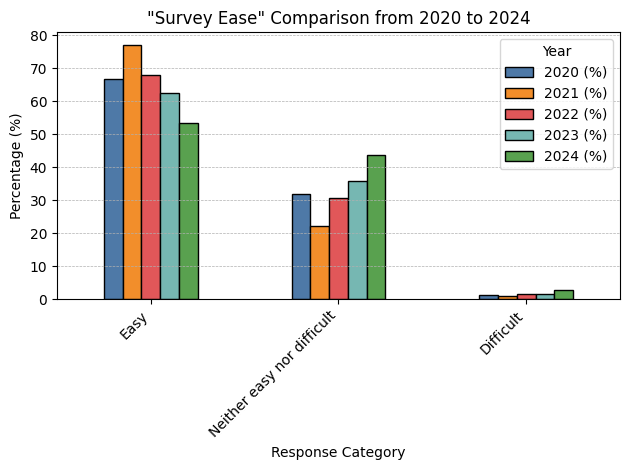

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentage for each category in survey difficulty from 2020 to 2024
# Round the output to improve readability in plot.
df_20_q1_percentage = (
    df_20_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100
).round(2)
df_21_q1_percentage = (
    df_21_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100
).round(2)
df_22_q1_percentage = (
    df_22_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100
).round(2)
df_23_q1_percentage = (
    df_23_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100
).round(2)
df_24_q1_percentage = (
    df_24_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100
).round(2)

# Create a new DataFrame to compare the percentages from 2020 to 2024
q1_comparison_df = pd.DataFrame({
    '2020 (%)': df_20_q1_percentage,
    '2021 (%)': df_21_q1_percentage,
    '2022 (%)': df_22_q1_percentage,
    '2023 (%)': df_23_q1_percentage,
    '2024 (%)': df_24_q1_percentage
})

# Plot the comparison
plt.figure(figsize=(10, 6))
q1_comparison_df.plot(
    kind='bar',
    color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F'],
    edgecolor='black'
)
plt.title('"Survey Ease" Comparison from 2020 to 2024')
plt.xlabel('Response Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Save image as SVG
plt.savefig('./doc/q1.png', format='png', dpi=300)

# Display the comparison DataFrame
q1_comparison_df

The survey seemed to become easier after the first year but then became progressively more difficult each year after 2021. The most challenging survey for the participants was the most recent one in 2024.

Therefore, the evaluation of the next question is very interesting, as we aim to determine if the length of the survey influenced the perceived difficulty.


### 5.2 Evaluate - Question 2

To answer the second question   
**When comparing the results from 2020 to 2024 does the length of the survey have and effect on its experienced difficulty?**

To evaluate this Question we can use the colums 'SurveyEase' and 'SurveyLength' of the cleaned dataset.
Within this dataset each year from 2020 to 2024 was combined so we have a total of 345.172 datapoints for each column.

In [48]:
# Calculating the contingency table
contingency_table = pd.crosstab(
    df_combined_q1q2_cleaned['SurveyEase'],
    df_combined_q1q2_cleaned['SurveyLength']
)

# Converting the contingency table to percentages
contingency_table_percent = contingency_table.div(
    contingency_table.sum(axis=1), axis=0
) * 100

# Print the table
print(contingency_table)
print(contingency_table_percent.round(2))

SurveyLength                Appropriate in length  Too long  Too short
SurveyEase                                                            
Difficult                                    1343      3802        207
Easy                                       184109     35247       9318
Neither easy nor difficult                  75871     33774       1501
SurveyLength                Appropriate in length  Too long  Too short
SurveyEase                                                            
Difficult                                   25.09     71.04       3.87
Easy                                        80.51     15.41       4.07
Neither easy nor difficult                  68.26     30.39       1.35


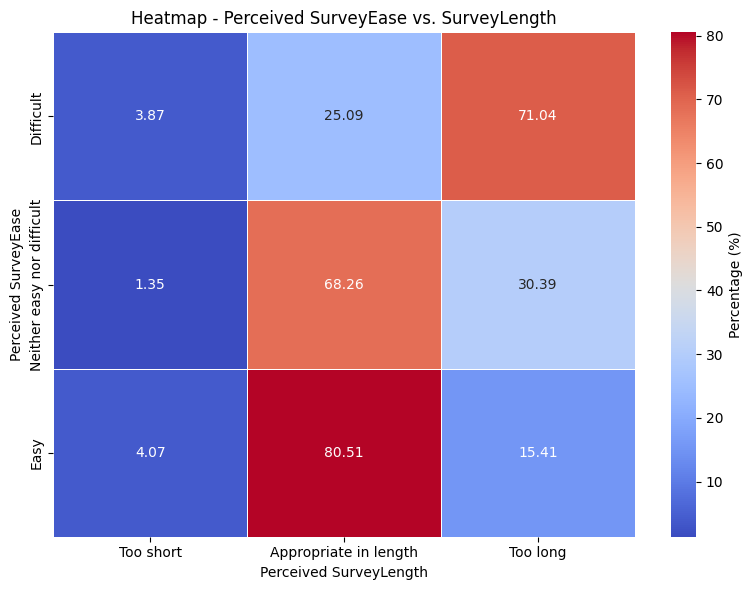

In [49]:
# Reordering x and y axes for better readability for the blog post
reorder_x = ['Too short', 'Appropriate in length', 'Too long']
reorder_y = ['Difficult', 'Neither easy nor difficult', 'Easy']

# Reindexing the contingency table
contingency_table_percent = contingency_table_percent.reindex(
    index=reorder_y, columns=reorder_x
)

# Plot the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(
    contingency_table_percent,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title('Heatmap - Perceived SurveyEase vs. SurveyLength')
plt.xlabel('Perceived SurveyLength')
plt.ylabel('Perceived SurveyEase')
plt.tight_layout()

# Save the heatmap as an SVG
plt.savefig('./doc/q2.png', format='png', dpi=300)

# Display the plot
plt.show()

There seem to be a clear correlation regarding percieved SurveyEase and SurveyLength over the past years.
The survey is percieved "Easy" when it was "appropriate in length" and felt more challenging, when the percieved length was "too long".

### 5.3 Evaluate - Question 3

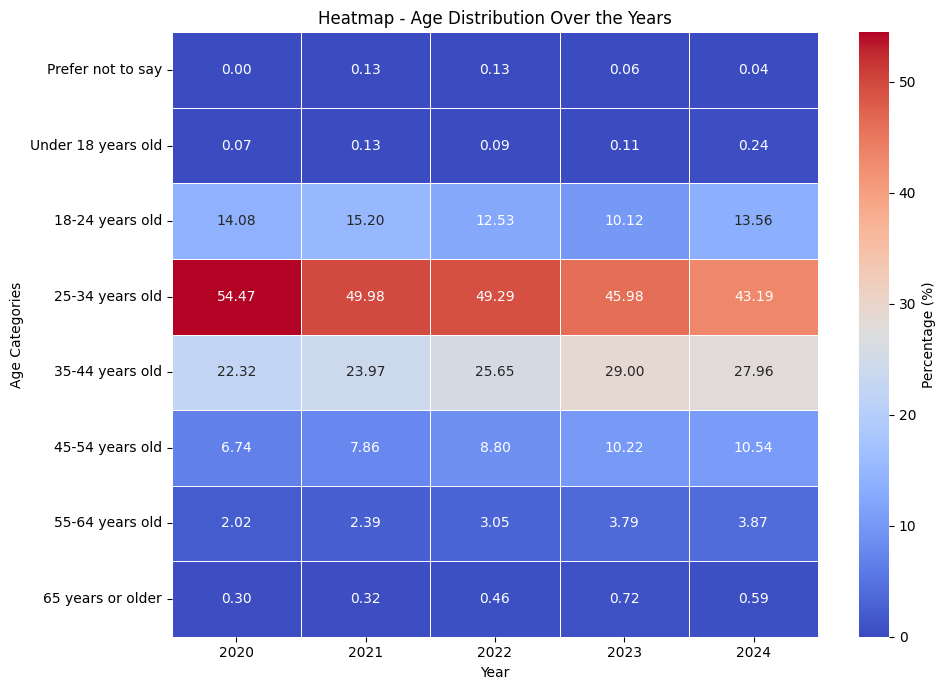

In [50]:
# Plot a heatmap using a contingency table (as before) to ...
# show the percentage distribution of age categories over the years.
df = df_comb_q3_complete_age_categorical # using name df, because its shorter

age_column='Age'
year_column='Datafield'

# Calculate the contingency table (cross-tabulation)
contingency_table = pd.crosstab(df[year_column], df[age_column])

# Convert the contingency table to percentages
contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Optionally reorder the x and y axes (you can define your order here)
reorder_age = ['Prefer not to say', 'Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
reorder_year = sorted(df[year_column].unique())  # Sort years (2020: bottom, 2024 top)

# Reindexing the contingency table for better readability
contingency_table_percent = contingency_table_percent.reindex(columns=reorder_age, index=reorder_year)

# Switch (Transpose) contingency table to switch x and y axes
contingency_table_percent = contingency_table_percent.T

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    contingency_table_percent,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title('Heatmap - Age Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Age Categories')
plt.tight_layout()

# Save image as SVG
plt.savefig('./doc/q3.png', format='png', dpi=300)

# Show plot
plt.show()

The data indicates a gradual shift in the age distribution of survey participants, with the 25–34 age group still dominant but slowly decreasing as older age groups gain more representation over the past years.

The increase in participation from those aged 35–54 suggests a growing diversity in the professional experience levels of respondents, as more “mid- and late-career professionals” are engaging with the survey.

Younger respondents (18–24), while already a smaller group, have shown a decline in participation over time, with a slight uptick in the most recent survey. This trend could be an opportunity to adjust the survey to better engage younger developers and encourage greater participation from this age group.